In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
df = pd.read_csv('Amazon Sale Report.csv',encoding='unicode_escape')

<ipython-input-4-c3c3ee10a954>:1: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Amazon Sale Report.csv',encoding='unicode_escape')


# **Data Cleaninig**

In [ ]:
df.shape


(70940, 21)

In [ ]:
df.head(5)

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN


In [ ]:
df.tail(5)

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
70935,70934,171-1232474-4209936,05-14-22,Cancelled,Amazon,Amazon.in,Expedited,Blazzer,S,Unshipped,...,INR,999.0,GHAZIABAD,UTTAR PRADESH,201014.0,IN,False,NaN,NaN,NaN
70936,70935,402-2693050-4669964,05-14-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,S,Shipped,...,INR,599.0,NOIDA,UTTAR PRADESH,201301.0,IN,False,NaN,NaN,NaN
70937,70936,402-4208636-9629100,05-14-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,L,Shipped,...,INR,709.0,Mumbai,MAHARASHTRA,400005.0,IN,False,Easy Ship,NaN,NaN
70938,70937,408-1174364-2381900,05-14-22,Cancelled,Amazon,Amazon.in,Expedited,T-shirt,3XL,Cancelled,...,NaN,NaN,SHILLONG,MEGHALAYA,793003.0,IN,False,NaN,NaN,NaN
70939,70938,404-0703163-1950707,05-14-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,XL,Shipped,...,I,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70940 entries, 0 to 70939
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               70940 non-null  int64  
 1   Order ID            70940 non-null  object 
 2   Date                70940 non-null  object 
 3   Status              70940 non-null  object 
 4   Fulfilment          70940 non-null  object 
 5   Sales Channel       70940 non-null  object 
 6   ship-service-level  70940 non-null  object 
 7   Category            70940 non-null  object 
 8   Size                70940 non-null  object 
 9   Courier Status      70940 non-null  object 
 10  Qty                 70940 non-null  int64  
 11  currency            66696 non-null  object 
 12  Amount              66695 non-null  float64
 13  ship-city           70922 non-null  object 
 14  ship-state          70922 non-null  object 
 15  ship-postal-code    70922 non-null  float64
 16  ship

In [ ]:
df.drop(['New','PendingS'],axis=1,inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70940 entries, 0 to 70939
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               70940 non-null  int64  
 1   Order ID            70940 non-null  object 
 2   Date                70940 non-null  object 
 3   Status              70940 non-null  object 
 4   Fulfilment          70940 non-null  object 
 5   Sales Channel       70940 non-null  object 
 6   ship-service-level  70940 non-null  object 
 7   Category            70940 non-null  object 
 8   Size                70940 non-null  object 
 9   Courier Status      70940 non-null  object 
 10  Qty                 70940 non-null  int64  
 11  currency            66696 non-null  object 
 12  Amount              66695 non-null  float64
 13  ship-city           70922 non-null  object 
 14  ship-state          70922 non-null  object 
 15  ship-postal-code    70922 non-null  float64
 16  ship

In [ ]:
pd.isnull(df)
# checking null value

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
12,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70926,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
70927,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
70928,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
70931,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
pd.isnull(df).sum()
# sum will give total values of null values

index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Category                  0
Size                      0
Courier Status            0
Qty                       0
currency               4244
Amount                 4245
ship-city                18
ship-state               18
ship-postal-code         18
ship-country             18
B2B                       1
fulfilled-by          47876
dtype: int64

In [ ]:
df.shape

(70940, 19)

In [ ]:
#drop null values
df.dropna(inplace=True)

In [ ]:
df.shape

(22053, 19)

In [ ]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'fulfilled-by'],
      dtype='object')

In [ ]:
# change data type
df['ship-postal-code'] = df['ship-postal-code'].astype('int')

In [ ]:
#checking whether the  data type change or not
df['ship-postal-code'].dtype

dtype('int64')

In [ ]:
df['Date']=pd.to_datetime(df['Date'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22053 entries, 0 to 70937
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   index               22053 non-null  int64         
 1   Order ID            22053 non-null  object        
 2   Date                22053 non-null  datetime64[ns]
 3   Status              22053 non-null  object        
 4   Fulfilment          22053 non-null  object        
 5   Sales Channel       22053 non-null  object        
 6   ship-service-level  22053 non-null  object        
 7   Category            22053 non-null  object        
 8   Size                22053 non-null  object        
 9   Courier Status      22053 non-null  object        
 10  Qty                 22053 non-null  int64         
 11  currency            22053 non-null  object        
 12  Amount              22053 non-null  float64       
 13  ship-city           22053 non-null  object    

In [ ]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'fulfilled-by'],
      dtype='object')

In [ ]:
df.rename(columns={'Qty':'Quantity'})

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Quantity,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by
0,0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,INR,647.62,MUMBAI,MAHARASHTRA,400081,IN,False,Easy Ship
1,1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085,IN,False,Easy Ship
3,3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008,IN,False,Easy Ship
7,7,406-7807733-3785945,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,S,Shipped,1,INR,399.00,HYDERABAD,TELANGANA,500032,IN,False,Easy Ship
12,12,405-5513694-8146768,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,XS,Shipped,1,INR,399.00,Amravati.,MAHARASHTRA,444606,IN,False,Easy Ship
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70926,70925,408-6521998-5057943,2022-05-14,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,XS,Shipped,1,INR,301.00,PATNA,BIHAR,800013,IN,False,Easy Ship
70927,70926,408-6521998-5057943,2022-05-14,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,XS,Shipped,1,INR,301.00,PATNA,BIHAR,800013,IN,False,Easy Ship
70928,70927,405-6789474-0145910,2022-05-14,Shipped - Returned to Seller,Merchant,Amazon.in,Standard,T-shirt,XL,Shipped,1,INR,878.00,Mumbai,MAHARASHTRA,400101,IN,False,Easy Ship
70931,70930,408-2478642-3677115,2022-05-14,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Blazzer,3XL,Shipped,1,INR,771.00,SECUNDERABAD,TELANGANA,500025,IN,False,Easy Ship


In [ ]:
#describe() method return description of the data in the DataFrame(i.e count,mean,std,min..etc)
df.describe()

,index,Qty,Amount,ship-postal-code
count,22053.00000,22053.000000,22053.000000,22053.000000
mean,35023.17798,0.866503,628.932406,459744.845509
std,21709.83157,0.353841,274.484139,197352.589446
min,0.00000,0.000000,0.000000,110001.000000
25%,15981.00000,1.000000,449.000000,332001.000000
50%,32571.00000,1.000000,597.000000,500008.000000
75%,56150.00000,1.000000,771.000000,600042.000000
max,70936.00000,5.000000,5495.000000,989898.000000


In [ ]:
#use describe() for specific columns
df.describe(include='object')

,Order ID,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,currency,ship-city,ship-state,ship-country,B2B,fulfilled-by
count,22053,22053,22053,22053,22053,22053,22053,22053,22053,22053,22053,22053,22053,22053
unique,20261,8,1,1,1,8,11,2,1,3384,53,1,2,1
top,403-0173977-3041148,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,M,Shipped,INR,BENGALURU,MAHARASHTRA,IN,False,Easy Ship
freq,11,17670,22053,22053,22053,8540,4027,19024,22053,1626,3697,22053,21869,22053


In [ ]:
df[['Qty','Amount']].describe()

,Qty,Amount
count,22053.000000,22053.000000
mean,0.866503,628.932406
std,0.353841,274.484139
min,0.000000,0.000000
25%,1.000000,449.000000
50%,1.000000,597.000000
75%,1.000000,771.000000
max,5.000000,5495.000000


# **Exploratory Data Analysis**

In [ ]:
df.columns


Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'fulfilled-by'],
      dtype='object')

**Size**

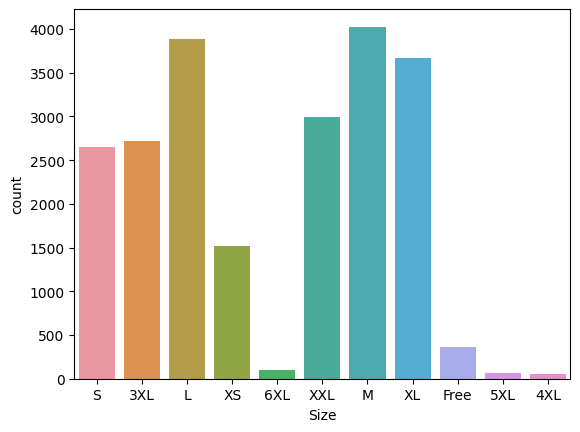

In [ ]:
ax = sns.countplot(x='Size',data=df)

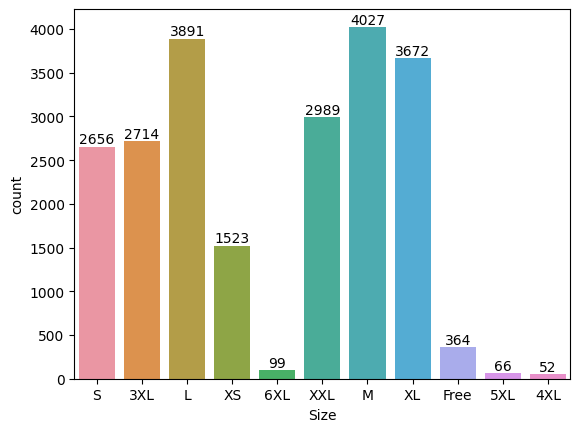

In [ ]:
ax = sns.countplot(x='Size',data=df)
for bars in ax.containers:
  ax.bar_label(bars)

**Note: From above graph you can see most of the people buys M size**

# **Group By**

**The groupby() function in pandas is used to group data based on one or more columns in dataframe**

In [ ]:
df.groupby(['Size'], as_index=False)['Qty'].sum().sort_values(by='Qty',ascending=False)


,Size,Qty
6,M,3478
5,L,3389
8,XL,3183
10,XXL,2615
0,3XL,2388
7,S,2282
9,XS,1276
4,Free,306
3,6XL,89
2,5XL,59


<Axes: xlabel='Size', ylabel='Qty'>

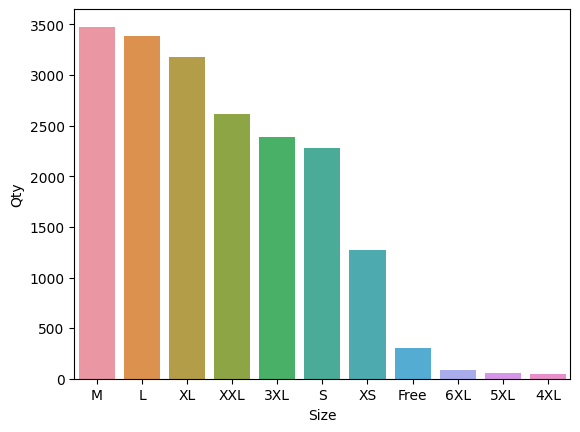

In [ ]:
S_Qty = df.groupby(['Size'], as_index=False)['Qty'].sum().sort_values(by='Qty',ascending=False)
sns.barplot(x='Size', y='Qty',data=S_Qty)

***Note:From above Graph you can see that most of the Qty buys M-Size in the sale***

# **Courier Status**

<Axes: xlabel='Courier Status', ylabel='count'>

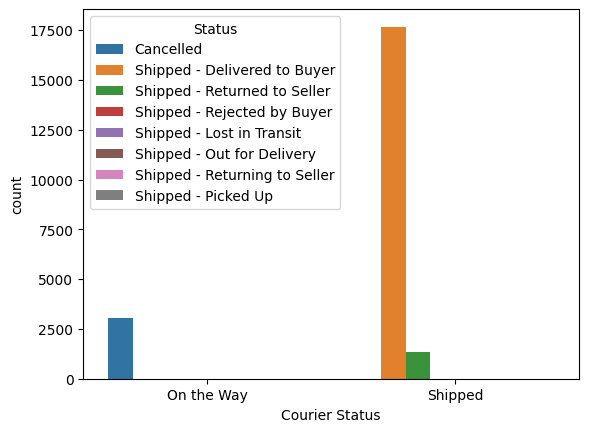

In [ ]:
sns.countplot(data=df,x='Courier Status',hue='Status')

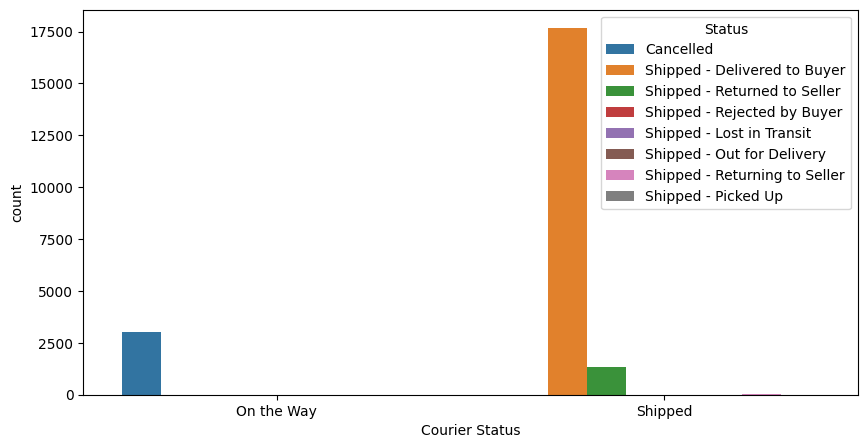

In [ ]:
plt.figure(figsize=(10,5))
ax = sns.countplot(data=df,x='Courier Status',hue='Status')
plt.show()

***Note:From the above Graph majority of the orders are shipped through the courier***

<Axes: >

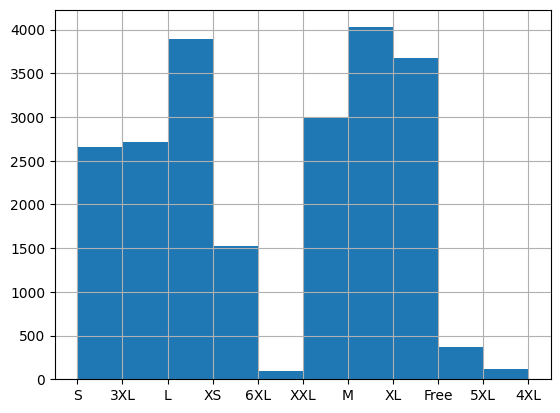

In [ ]:
 #histogram
 df['Size'].hist()

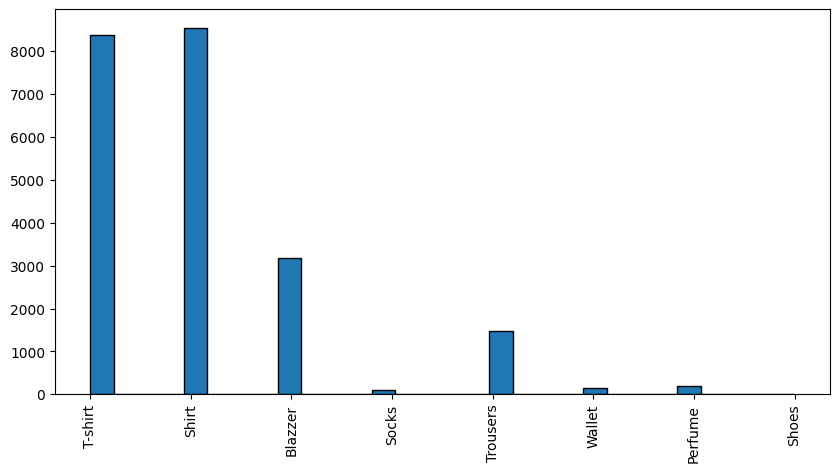

In [ ]:
df['Category'] = df['Category'].astype(str)
column_data = df['Category']
plt.figure(figsize=(10,5))
plt.hist(column_data,bins=30,edgecolor='Black')
plt.xticks(rotation=90)
plt.show()

***Note:From the above graph we can see most of the buyers are of T-shirt***

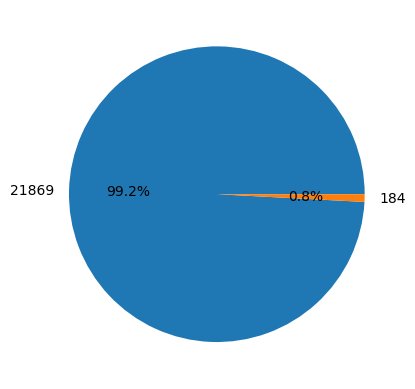

In [ ]:
#checking B2B data using pie chart
B2B_Check = df['B2B'].value_counts()

#plot the pie chart
plt.pie(B2B_Check,labels=B2B_Check,autopct='%1.1f%%')
#plt.axis('equal)
plt.show()

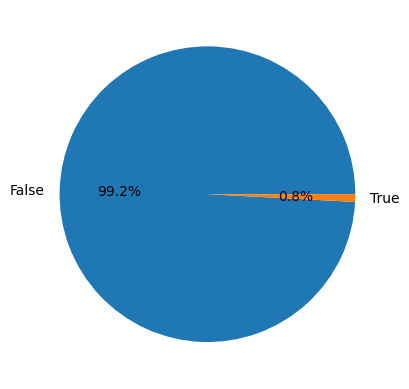

In [ ]:
#checking B2B data using pie chart
B2B_Check = df['B2B'].value_counts()

#plot the pie chart
plt.pie(B2B_Check,labels=B2B_Check.index,autopct='%1.1f%%')
#plt.axis('equal)
plt.show()

***note:From the above chart we can see that maximum i.e 99.2% of the buyers are retailers and 0.8% are B2B buyers ***

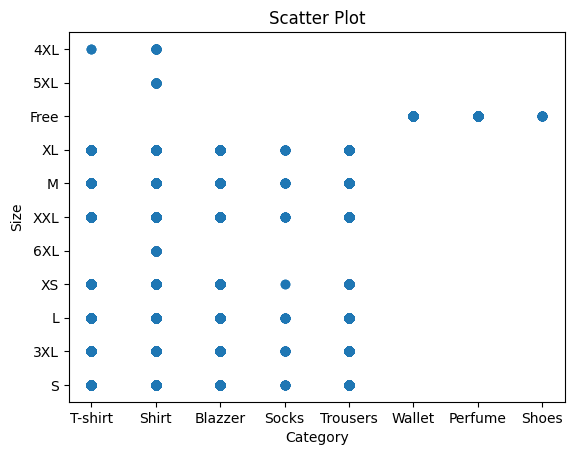

In [ ]:
#prepare data for scatter plot
x_data = df['Category']
y_data = df['Size']

#plot the scatter plot
plt.scatter(x_data,y_data)
plt.xlabel('Category')
plt.ylabel('Size')
plt.title('Scatter Plot')
plt.show()

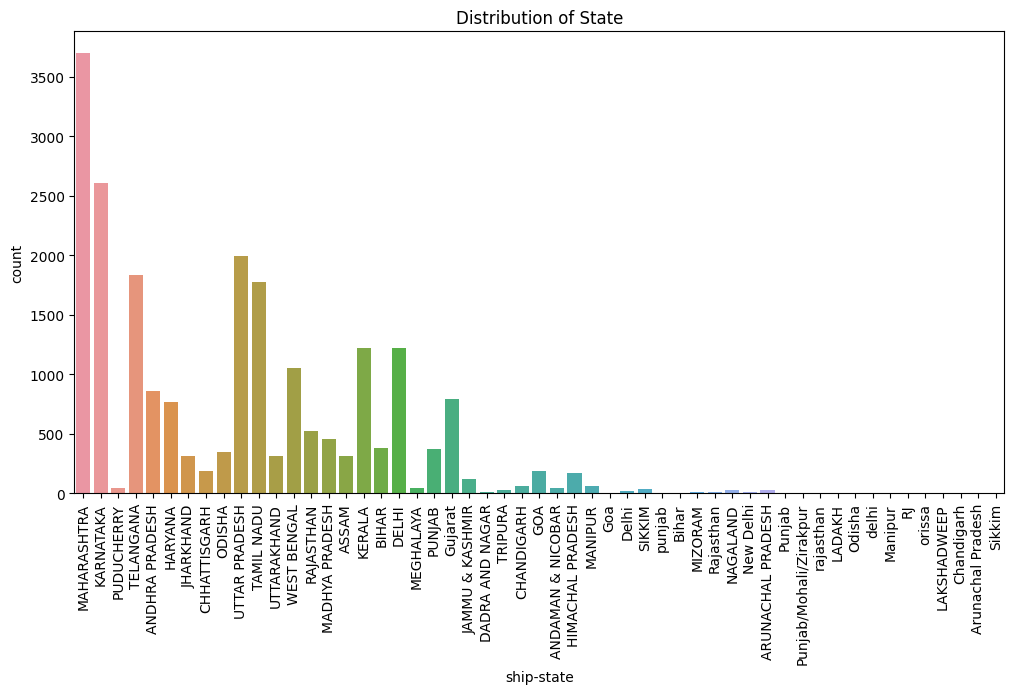

In [ ]:
#plot count of cities by state
plt.figure(figsize=(12,6))
sns.countplot(data=df,x='ship-state')
plt.xlabel('ship-state')
plt.ylabel('count')
plt.title('Distribution of State')
plt.xticks(rotation=90)
plt.show()

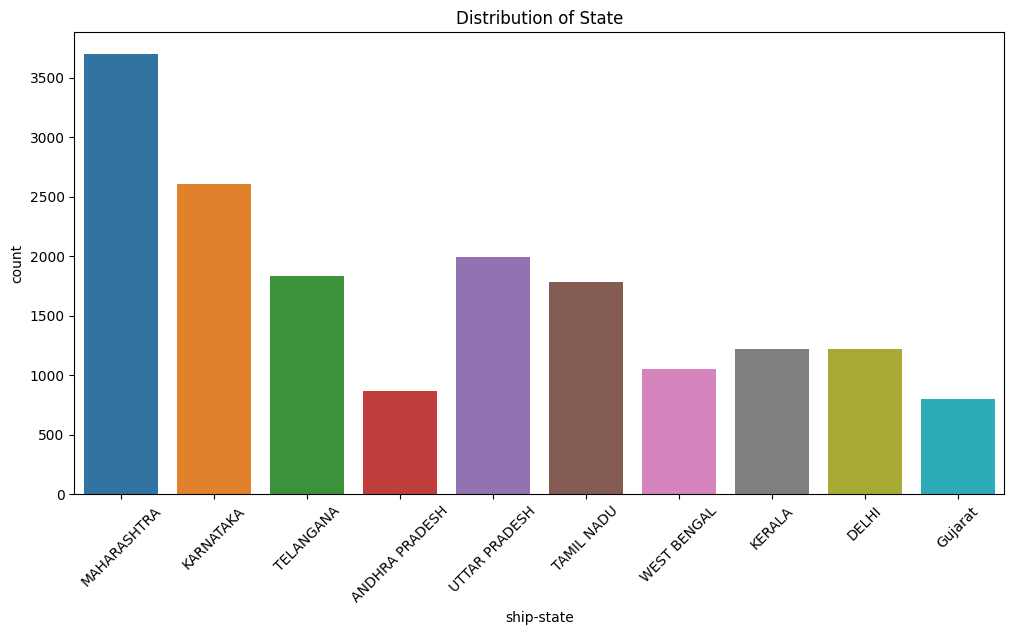

In [ ]:
#top 10 states
top_10_state = df['ship-state'].value_counts().head(10)
#plot count of cities by state
plt.figure(figsize=(12,6))
sns.countplot(data=df[df['ship-state'].isin(top_10_state.index)],x='ship-state')
plt.xlabel('ship-state')
plt.ylabel('count')
plt.title('Distribution of State')
plt.xticks(rotation=45)
plt.show()

***note:From above graph we can see most of the buyers are from Maharashtra state***

# **CONCLUSION**

**The data analysis reveals that the business has a significant customer base in Maharashtra state, mainly serves retailers, fulfills orders through Amazon, experiences high demand for T-shirts, and sees M-Size as the preferred choice among buyers.**